[datasets](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs)

In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")

import re

from scipy import sparse

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error


from scipy.stats import uniform
from scipy.stats import randint

# First Touch of Data 

In [2]:
df = pd.read_csv("D:/MachineLearning/Kaggle/data/spotify_songs.csv")

df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Not all the columns are useful to our song popularity prediction, for instance, `track_id` and `track_artist`.

13 numerical columns, 10 text columns, no NA value.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# Split Training, Validation, and Testing Dataset

70% Training set, 15% Validation set, 15% Testing set.

In [4]:
df_1 = df.copy() # 保留原 data
df_train, df_test = train_test_split(df_1, test_size=0.15, random_state=42)
df_train, df_validate = train_test_split(df_train, test_size=0.15 / 0.85, random_state=42)

# EDA

In [5]:
df.loc[df["track_popularity"] == 0]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
476,1gsb4CFzUMERAkfzAKwrZu,Siren,SUNMI,0,75eIP5pPvtQCB0bAz2TEsU,WARNING,2018-09-26,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,...,9,-3.885,0,0.0385,0.011900,0.000000,0.0887,0.545,122.051,197252
772,4yEXem27DzCg8xytvvO3E9,Lollipop (Candyman),Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0,-3.612,0,0.0310,0.031700,0.007400,0.1710,0.861,139.047,215053
801,7vHkU1H73z5NVbGTIyI1DG,Around The World,Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,6,-3.847,1,0.0312,0.003320,0.000182,0.5370,0.969,129.934,209120
883,3decfgk2pFkvCzYUFj6ssf,I'm Yours,Influencers Worship,0,2FQCn5R6hSDeGYgUCW5kN9,I'm Yours,2018-07-06,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,...,11,-6.397,0,0.0557,0.000186,0.000994,0.1690,0.357,127.995,205280
934,5KHbu2Go6NBryS0h0TpTNJ,Talk About It,Bancali,0,5aBI1WNIur9niQ5dM6xnVB,Talk About It,2018-01-17,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,7,-6.740,0,0.2230,0.508000,0.000521,0.4190,0.318,110.024,248727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32800,5yl2YyDgcpERTZoZHD9Etl,Dynamite,Gareth Emery,0,3Zm13AWIMBpJbwFzenqy9V,Drive,2014-04-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-6.113,1,0.0312,0.011100,0.656000,0.0991,0.314,127.986,292284
32810,0ZAPuWOQiiY0nGbLPlozT8,Lights & Thunder - Club Mix,Gareth Emery,0,6yHi6saMH67HPD59a6arK1,Lights & Thunder,2014-03-31,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.654,0,0.0430,0.001980,0.019700,0.5340,0.171,128.004,313877
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.040,0,0.0409,0.006780,0.000000,0.0677,0.391,127.906,204609
32821,3fgNmvYq0QU5aFHDUMa4cm,Unleash (Life In Color Anthem 2014) - Original...,Adventure Club,0,4qzYTF7mwcWMbEFdw5qcHB,Unleash,2014-04-16,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-4.514,0,0.0547,0.004440,0.000041,0.0433,0.342,127.979,331000


# Data Preprocessing

Split the numerical and categorical data frame. Because the numerical values of key and mode do not meaningfully reflect the differences among their combinations, they are regarded as categorical variables.

In [5]:
df_train_num = df_train.iloc[:, [3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] # 含 key 和 mode
df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["key", "mode"])]

df_train_cat = df_train.drop(columns= df_train_num.columns)

Next, let's first focus on the numerical variables.

## Transformation for Numerical Variable

Check the distributions of the numerical variables.

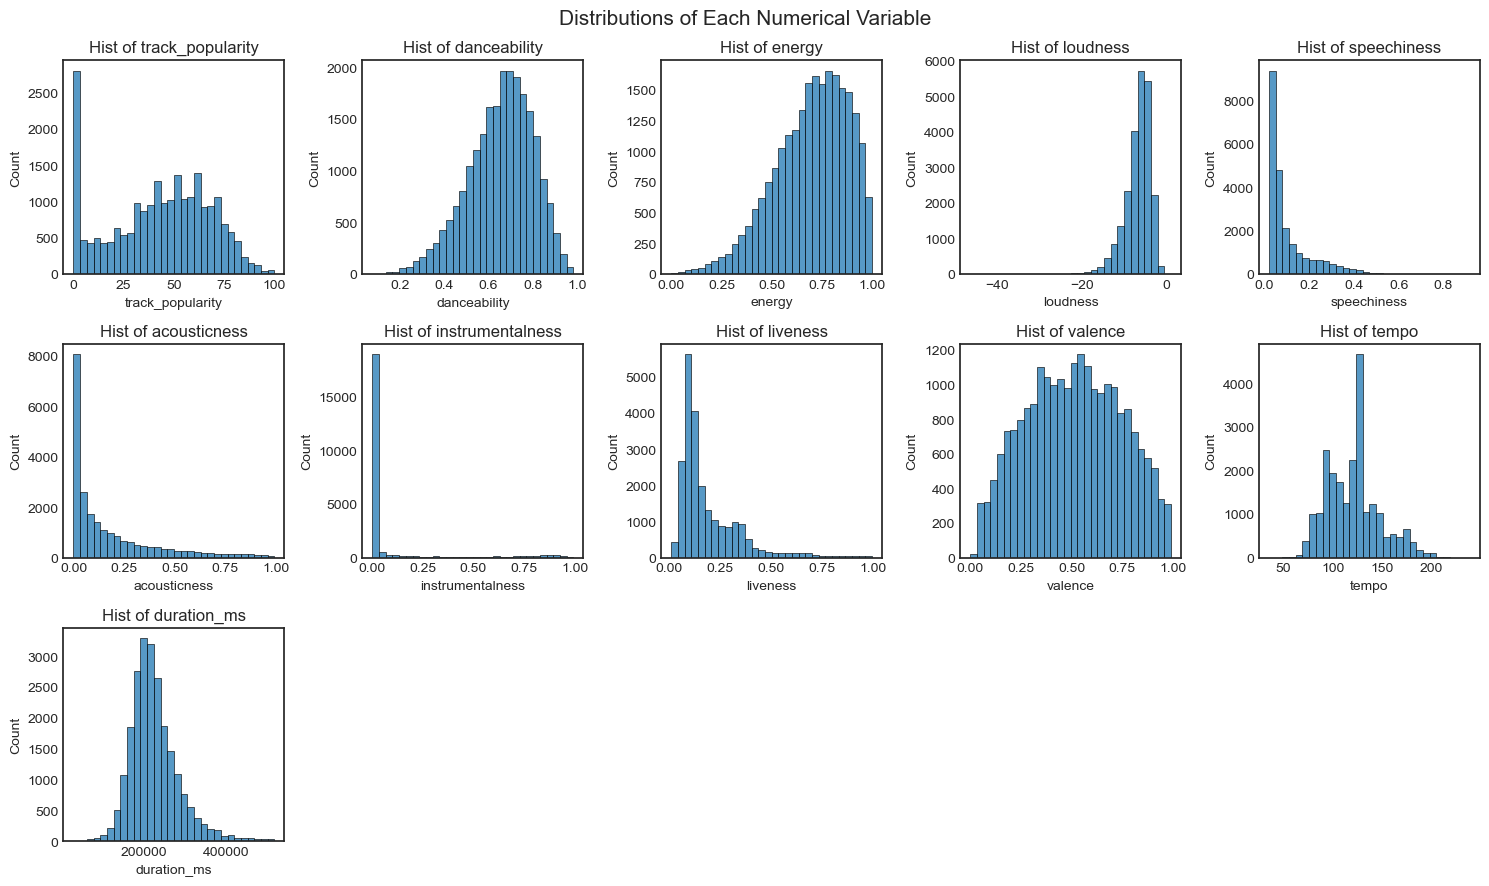

In [6]:
figure, axes = plt.subplots(3, 5, figsize = (15,9))

for i in range(5):
    sns.histplot(df_train_num.iloc[:,i], ax = axes[0,i], bins=30 )
    axes[0,i].set_title(f"Hist of {df_train_num.columns[i]}")

for i in range(5):
    sns.histplot(df_train_num.iloc[:,i+5], ax = axes[1,i], bins=30)
    axes[1,i].set_title(f"Hist of {df_train_num.columns[i+5]}")

sns.histplot(df_train_num.iloc[:,10], ax = axes[2,0], bins=30)
axes[2,0].set_title(f"Hist of {df_train_num.columns[10]}")

for ax in axes.flat[11:]:
    ax.set_visible(False)


figure.suptitle('Distributions of Each Numerical Variable', fontsize = 15)
plt.tight_layout()
plt.show()

There are heavily skewed vairables, such as `speechiness` and `acousticness`. However, since our proposed models are ensemble tree-based learning algorithms, we do not need to transform them to maintain their data characteristics, so the algorithms can optimally learn from them. 

Notice that a certain amount of songs have a song popularity of 0, even though their attribute values are normally recorded. Since it is unreasonable for these songs to have zero popularity and they account for only a small proportion of the dataset, it is reasonable to remove these observations.

In [7]:
col_lis = ['track_popularity',]

for col in col_lis:
    print(f"0 value proportion in {col}: ", (df_train_num[col] == 0).sum() / df_train_num.shape[0])


0 value proportion in track_popularity:  0.08249575773397728


In [8]:
mask = df_train_num[df_train_num["track_popularity"] == 0].index
df.loc[mask].sample(10, random_state =42)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
31430,6eHdpP7niG0wzF21ZpFFFD,Jupiter Unison - 3LAU Bootleg,3LAU,0,6GO3f2Bc5YoVcS2IALtfDC,Dance Floor Filth 2,2012-07-17,Vocal House,5PCAWKfUWAUj8VeY8G7xRQ,edm,...,6,-5.355,0,0.0545,0.019500,0.000000,0.3090,0.574,127.389,204565
18087,2GaNvbALXoQ8XrcsbZcBNf,Estar Contigo,Mike Bahía,0,4BNbdmdPgyGjuzFaVRF5QF,Estar Contigo - Single,2014-10-06,Latin Pop antiguo,4BmnnqWEQAamNoVjtjrQJP,latin,...,9,-5.947,1,0.0834,0.116000,0.000000,0.0797,0.561,97.061,228820
29034,2LTl57FB0Q8rf8OtuWpl1V,Making Me Dizzy,Tiësto,0,0c2NWt5RqMp05OOHN5eg9h,Making Me Dizzy,2016-03-28,big boom room — TOMORROWLAND EDC EDM BIG ROOM ...,2oalsaFUockoPf1DU3wrL8,edm,...,6,-4.307,1,0.0851,0.001360,0.561000,0.4210,0.646,126.002,188239
18047,5yCL2cAXj3gxZGfcKSzp7W,Carita Bonita,Erre XI,0,6ZrLVdx4Ba8QwuGxJU4vqB,Latin Party,2012-01-01,Latin Pop antiguo,4BmnnqWEQAamNoVjtjrQJP,latin,...,4,-4.899,0,0.1250,0.175000,0.000007,0.3270,0.818,102.001,254907
29437,5V5s7nnLtYJ9Sn8LY90V4D,Get Up,Tujamo,0,2phlGYm3GpQqvcX2DSuYeZ,Get Up,2019-01-18,Big Room 2019,6SrHyxIxWfQx9ISEr6yowk,edm,...,1,-3.493,1,0.0706,0.013200,0.834000,0.0272,0.639,125.969,133333
24070,21wxCbULEulBXZ4GaGqVNA,Go See the Doctor,Kool Moe Dee,0,5eFIhSi6LAYlfOwLCOffyT,Kool Moe Dee,1986,New Jack Swing,3ykXidKLz1eYPvuGoFlD1e,r&b,...,1,-13.601,1,0.1750,0.004920,0.001570,0.0338,0.730,89.289,332307
24895,7nX2FSz4m94R7DErMJsPJi,Don't Be Cruel,Bobby Brown,0,6tTpGbdyLgRQHaCe0DbCOP,Don't Be Cruel (Expanded),1988-06-20,The New (Jack Swing) Testament,4mciQwEuqaUMwIWKcDMFW0,r&b,...,1,-8.882,1,0.0540,0.000130,0.000007,0.2070,0.744,102.396,408333
9710,4tTBDyNwQm9dyh6DS3spB5,Volar Volar,Cartel De Santa,0,2MR4m2OTRg9a0SB1d0SWgl,Sincopa,2010-05-24,Mexican Gangsta Rap,28Ke4pXWqF2A5b2GfQ1pQt,rap,...,1,-6.208,1,0.2220,0.018500,0.007410,0.0984,0.668,179.992,293360
24388,6SqTyTqxNHJDWO5aFMjWV1,How Deep Is Your Love - Single Version,Dru Hill,0,156wPPYVbtFSTgi6E1ZNZA,Hits,2005-10-11,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",3krpccUV68nBGAQbvHEZDC,r&b,...,1,-8.119,1,0.1190,0.022800,0.000000,0.3270,0.782,93.766,228693
15054,7Eieiwd3Jm0aU9IxtaA1Ev,Lift Me Up,Five Finger Death Punch,0,1PNLoFuOuSpxKb0musG2w5,Lift Me Up,2013-01-01,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,rock,...,4,-3.650,1,0.1450,0.000094,0.000000,0.3640,0.224,150.027,246613


### Correlation

Detect any severe correlation.

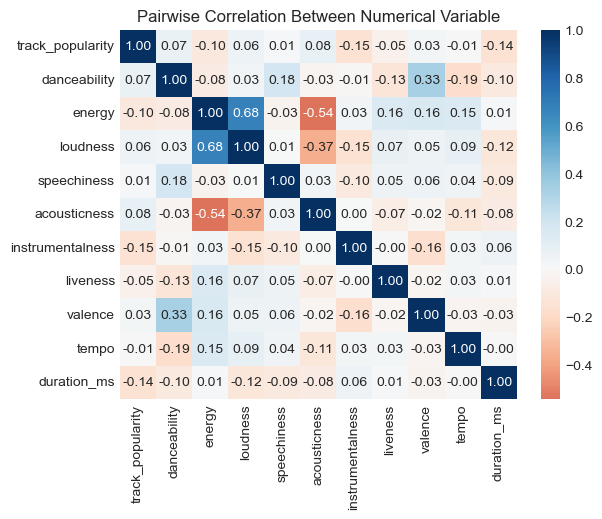

In [9]:
corr = df_train_num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0)
plt.title('Pairwise Correlation Between Numerical Variable')
plt.show()

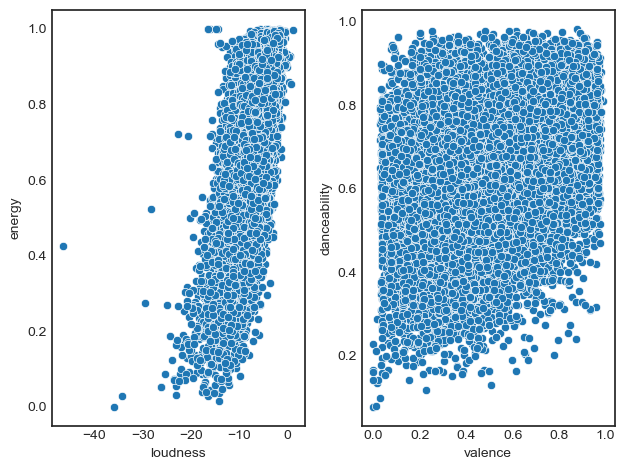

In [10]:
fig, axes = plt.subplots(1,2)

sns.scatterplot(x = df_train_num["loudness"], y = df_train_num["energy"], ax=axes[0])

sns.scatterplot(x = df_train_num["valence"], y = df_train_num["danceability"], ax=axes[1])
plt.tight_layout()
plt.show()

It's commen sense that the louder the track, the more energy it has. Combine these two columns and assign them equal weights to reduce their high correlation.

In [11]:
df_train_num["loudness_energy_combined"] = (df_train_num["loudness"] + df_train_num["energy"]) / 2
df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["energy", "loudness"])]

#df_train_num["acousticness"] = np.where(df_train_num["acousticness"] > 0.5, "acoustic", "non-acoustic")

#df_train_cat = pd.concat([df_train_cat, df_train_num["acousticness"]], axis=1)
#df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["acousticness"])]

After exploring the numerical variables, we combined all the processing steps so far into one function, and pass the data frame to the next step for text cleaning.

In [12]:
def creat_df_combo_and_y(df):
    df_num = df.iloc[:, [3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] # 含 key 和 mode
    df_num = df_num.loc[:, ~ df_num.columns.isin(["key", "mode"])]

    df_cat = df.drop(columns= df_num.columns)

    df_num["loudness_energy_combined"] = (df_num["loudness"] + df_num["energy"]) / 2
    df_num = df_num.loc[:, ~ df_num.columns.isin(["energy", "loudness"])]

    #df_num["acousticness"] = np.where(df_num["acousticness"] > 0.5, "acoustic", "non-acoustic")

    #df_cat = pd.concat([df_cat, df_num["acousticness"]], axis=1)
    #df_num = df_num.loc[:, ~ df_num.columns.isin(["acousticness"])]

    mask = df_num[df_num["track_popularity"] != 0].index # remove 0 target value
    df_num = df_num.loc[mask]
    df_cat = df_cat.loc[mask]

    y = df_num.iloc[:, 0].to_numpy()
    df_num = df_num.iloc[:, 1:]

    return (y, df_cat, df_num)

In [13]:
y_train, df_train_cat, df_train_num = creat_df_combo_and_y(df_train) # training set
y_test, df_test_cat, df_test_num =creat_df_combo_and_y(df_test) # testing set
y_validate, df_validate_cat, df_validate_num = creat_df_combo_and_y(df_validate) # validate set

y_train_concat = pd.Series(y_train, index=df_train_num.index)
y_test_concat = pd.Series(y_test, index=df_test_num.index)
y_validate_concat = pd.Series(y_validate, index = df_validate_num.index)

df_train_num = pd.concat([y_train_concat, df_train_num], axis=1).rename(columns={0: 'track_popularity'})
df_test_num = pd.concat([y_test_concat, df_test_num], axis=1).rename(columns={0: 'track_popularity'})
df_validate_num = pd.concat([y_validate_concat, df_validate_num], axis=1).rename(columns={0: 'track_popularity'})

In [14]:
df_train_cat.to_csv("dataset/df_train_cat_rs_42.csv", index=True, encoding="utf-8")
df_train_num.to_csv("dataset/df_train_num_rs_42.csv", index=True, encoding="utf-8")

df_validate_cat.to_csv("dataset/df_validate_cat_rs_42.csv", index=True, encoding="utf-8")
df_validate_num.to_csv("dataset/df_validate_num_rs_42.csv", index=True, encoding="utf-8")


df_test_cat.to_csv("dataset/df_test_cat_rs_42.csv", index=True, encoding="utf-8")
df_test_num.to_csv("dataset/df_test_num_rs_42.csv", index=True, encoding="utf-8")

## Categorical Variable

Relation among all the qualitative attributes that we have not processed so far.

<div align="center">
    <img src="./Song.png" width="600">
</div>

### Bag-of-word Matrix

For each song, we concatenate the `song title`, `album name`, `playlist genre` and `sub-playlist genre`, then based on the concatenated sentences, we create a bag-of-word matrix. The text cleaning detail is omitted for for brevity. All the detail can be found in the `text_cleaning` notebook.

Read the processed categorical data frame.

In [15]:
df_train_cat = pd.read_csv("dataset/df_train_cat_rs_42_processed.csv", index_col=0)

y_train = df_train_cat.iloc[:,0].to_numpy()
df_train_cat = df_train_cat.iloc[:,1:]
df_train_num = df_train_num.loc[df_train_cat.index]

#### Create Word Matrix + Categorical Varaible Encoding

Custom transformer for creating top-frequent word matrix. 

In [20]:
# 1. key one-h array 2.mode one-h array #3 key-mode interaction df
# 4. acousticness one-h 
def key_mode_interaction_encode(X):
    key_encoder = OneHotEncoder()
    mode_encoder = OneHotEncoder()
    #acoustic_encoder = OneHotEncoder()

    key_onehot = key_encoder.fit_transform(X[['key']])  
    mode_onehot = mode_encoder.fit_transform(X[['mode']])
    #acoustic_onehot = acoustic_encoder.fit_transform(X[["acousticness"]])

    n_samples, n_keys = key_onehot.shape 
    _, n_modes = mode_onehot.shape

    #key_mode_interaction_matrix = np.einsum('ij,ik->ijk', key_onehot.toarray(), mode_onehot.toarray()).reshape(key_onehot.shape[0], -1)
    
    key_idx = key_onehot.nonzero()[1]
    mode_idx = mode_onehot.nonzero()[1]
    rows = np.arange(n_samples)

    interaction_idx = key_idx * n_modes + mode_idx
    interaction_data = np.ones_like(rows, dtype=float)
    

    #key_labels = key_encoder.categories_[0]
    #mode_labels = mode_encoder.categories_[0]
    #interaction_columns = [f'key_{k}_x_mode_{m}' for k in key_labels for m in mode_labels

    key_mode_interaction = sparse.csr_matrix(
        (interaction_data, (rows, interaction_idx)),
        shape=(n_samples, n_keys * n_modes)
    )

    #return (key_onehot.toarray() , mode_onehot.toarray() , 
    #        pd.DataFrame(key_mode_interaction_matrix, columns=interaction_columns),
    #        acoustic_onehot.toarray())

    # all sparse
    return key_onehot, mode_onehot, key_mode_interaction #acoustic_onehot

In [16]:
class text_token_transformer_plus_encoding(BaseEstimator, TransformerMixin):
    def __init__(self, top_num = 500): # inital quantile 0.9
        self.top_num = top_num
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')
        
        self.key_encoder = OneHotEncoder()
        self.mode_encoder = OneHotEncoder()
        #self.acoustic_encoder = OneHotEncoder()

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]) # sparse matrix
        #self.term_counts_ = np.asarray(self.word_matrix_.sum(axis=0)).ravel()
        self.term_counts_ = self.word_matrix_.sum(axis=0).A1
        self.terms_ = self.vectorizer_.get_feature_names_out()

        self.key_encoder.fit(X[["key"]])
        self.mode_encoder.fit(X[["mode"]])
        #self.acoustic_encoder.fit(X[["acousticness"]])
        return self
    
    def transform(self, X, y = None):
        #threshold = pd.Series(self.term_counts_).quantile(self.quant)
        #threshold = np.quantile(self.term_counts_, self.quant)
        
        sort_lis = sorted(zip(self.term_counts_, self.terms_), key = lambda x: x[0], reverse= True)
        
        keep_idx = self.top_num
        sort_lis_cut = sort_lis[:keep_idx]
        
        word_lis_sorted = [pair[1] for pair in sort_lis_cut] # top down, sorted
        
        mask = np.isin(self.terms_, word_lis_sorted) 
        word_matrix = self.word_matrix_[:, mask]
        #keep_idx = np.where(self.term_counts_ >= threshold)[0]
        
        #keep_terms = self.terms_[keep_idx]

        #word_df = pd.DataFrame(self.word_matrix_, columns=self.terms_)
        #word_df = word_df[word_lis_sorted] # left to right columns, down 
        #word_matrix = self.word_matrix_[:, :keep_idx]

        ### encoding part
        #key_cat_matrix = key_mode_interaction_encode(X)[0]
        #mode_cat_matrix = key_mode_interaction_encode(X)[1]
        #key_mode_cat_interaction_matrix = key_mode_interaction_encode(X)[2]
        #acoustic_cat_matrix = key_mode_interaction_encode(X)[3]

        key_mat = self.key_encoder.transform(X[["key"]])
        mode_mat = self.mode_encoder.transform(X[["mode"]])
        
        n_samples, n_keys = key_mat.shape 
        _, n_modes = mode_mat.shape

        key_idx = key_mat.nonzero()[1]
        mode_idx = mode_mat.nonzero()[1]
        rows = np.arange(n_samples)

        interaction_idx = key_idx * n_modes + mode_idx
        interaction_data = np.ones_like(rows, dtype=float)
        
        key_mode_mat = sparse.csr_matrix(
            (interaction_data, (rows, interaction_idx)),
            shape=(n_samples, n_keys * n_modes)
        )

        final_mat = sparse.hstack([word_matrix, key_mat, mode_mat, key_mode_mat], format="csr")
        
        return final_mat

## Training Matrix

Whole Training Matrix Pipeline Structure

$\text{cleaned combined text}$ &rarr; $\text{word matrix}$ &rarr; $\text{combined columns 1}$: $\begin{bmatrix} \text{word matrix columns} & \text{categorical encoding matrix columns}  \end{bmatrix}$ &rarr; $\begin{bmatrix} \text{combined columns 1} & \text{numerical columns}  \end{bmatrix}$

### Scaling + Final concat Pipeline

In [17]:
df_train_combo = pd.concat([df_train_cat, df_train_num], axis = 1)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler_column = ColumnTransformer(
    transformers=[(
        "num", StandardScaler(), 
                  ['danceability', 'speechiness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'loudness_energy_combined', 'acousticness']
    )
                  ],
                  remainder="drop"
)

In [20]:
from sklearn.pipeline import FeatureUnion

# 平行处理categorical 和 numerical，最后 concatenate
# Input: df_train_cat + df_num_cat
Pipe_create_mat = FeatureUnion(transformer_list=[
    ('categorical', text_token_transformer_plus_encoding(top_num=500)), # sparse matrix
    ('numerical', scaler_column)
])

# Model training

<ul>
  <li>
    Model training
    <ul>
      <li>
        Original Training Matrix (Baseline)
      </li>
      <li>
        Training Matrix with Unsupervised Technique
        <ul>
          <li>Dimension Reduction</li>
          <li>Anomaly detection</li>
        </ul>
      </li>
            <li>
        Training Matrix with Feature selection
        <ul>
          <li>LASOO</li>
          <li>Step-wise</li>
        </ul>
      </li>
    </ul>
  </li>
</ul>

Tree based algorithms: Random Forest, XGBoost, LightGBM

In [21]:
df_test_cat = pd.read_csv("dataset/df_test_cat_rs_42_processed.csv", index_col=0)
y_test = df_test_cat.iloc[:,0].to_numpy()
df_test_cat = df_test_cat.iloc[:,1:]
df_test_num = df_test_num.loc[df_test_cat.index]
df_test_combo = pd.concat([df_test_cat, df_test_num], axis = 1)

In [22]:
df_validate_cat = pd.read_csv("dataset/df_validate_cat_rs_42_processed.csv", index_col=0)
y_validate = df_validate_cat.iloc[:,0].to_numpy()
df_validate_cat = df_validate_cat.iloc[:,1:]
df_validate_num = df_validate_num.loc[df_validate_cat.index]
df_validate_combo = pd.concat([df_validate_cat, df_validate_num], axis = 1)

## Numeric-only Training Matrix (Baseline)

We use the models fitted on the training matrix containing only numerical features be our baseline models. And for each algorithm, we randomly choose parameter combinations from the parameter distributions for the final model optimization.

### Random Forest

In [25]:
params_rf = {
    'n_estimators': 374,
    'max_depth': 11,
    'min_samples_split': 7,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    }

In [26]:
rf_reg = RandomForestRegressor(**params_rf, bootstrap=True, random_state= 123)
rf_reg.fit(df_train_num, y_train)

RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=7, n_estimators=374, random_state=123)

In [27]:
pred_rf_base = rf_reg.predict(df_train_num)
print("Baseline Random Forest training MSE: ", mean_squared_error(pred_rf_base, y_train))
print("Baseline Random Forest training R^2: ", r2_score(pred_rf_base, y_train))

print("\n")
pred_rf_base = rf_reg.predict(df_validate_num)
print("Baseline Random Forest validating MSE: ", mean_squared_error(pred_rf_base, y_validate))
print("Baseline Random Forest validating R^2: ", r2_score(pred_rf_base, y_validate))

Baseline Random Forest training MSE:  4.421292121622717
Baseline Random Forest training R^2:  0.9884708338526711


Baseline Random Forest validating MSE:  7.037317476704521
Baseline Random Forest validating R^2:  0.9824582186224342


### XGBoost

In [28]:
params_xgb = {
    'n_estimators': 347,        # randint(100, 500)
    'learning_rate': 0.173,     # uniform(0.01, 0.29)
    'max_depth': 8,             # randint(3, 10)
    'subsample': 0.5,           # uniform(0.5, 0.5)
    'colsample_bytree': 0.5,    # uniform(0.5, 0.5)
    'gamma': 0.327,             # uniform(0, 0.5)
    'reg_lambda': 2.64          # uniform(1, 4)
}

xgb_reg = xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state=123)
xgb_reg.fit(df_train_num, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.327, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.173, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=347,
             n_jobs=None, num_parallel_tree=None, ...)

In [29]:
pred_xgb_base = xgb_reg.predict(df_train_num)
print("Baseline XG Boost training MSE: ", mean_squared_error(pred_xgb_base, y_train))
print("Baseline XG Boost training R^2: ", r2_score(pred_xgb_base, y_train))

print("\n")
pred_xgb_base = xgb_reg.predict(df_validate_num)
print("Baseline XG Boost validating MSE: ", mean_squared_error(pred_xgb_base, y_validate))
print("Baseline XG Boost validating R^2: ", r2_score(pred_xgb_base, y_validate))

Baseline XG Boost training MSE:  0.10731316357851028
Baseline XG Boost training R^2:  0.999755322933197


Baseline XG Boost validating MSE:  1.6296517848968506
Baseline XG Boost validating R^2:  0.9964720606803894


### LightGBM

In [30]:
params_lgb = {
    'n_estimators': 786,
    'learning_rate': 0.073,
    'num_leaves': 67,
    'max_depth': 12,
    'min_child_samples': 28,
    'subsample': 0.73,
    'colsample_bytree': 0.84,
    'reg_alpha': 0.32,
    'reg_lambda': 0.61
}

lgb_reg = lgb.LGBMRegressor(**params_lgb, objective='regression_l2', eval_metric = 'rmse', random_state=123)
lgb_reg.fit(df_train_num, y_train)

d:\miniconda3\envs\pydata-book\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\miniconda3\envs\pydata-book\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\miniconda3\envs\pydata-book\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\miniconda3\envs\pydata-book\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\miniconda3\envs\pydata-book\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the train set: 16125, number of used features: 10
[LightGBM] [Info] Start training from score 45.558698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

LGBMRegressor(colsample_bytree=0.84, eval_metric='rmse', learning_rate=0.073,
              max_depth=12, min_child_samples=28, n_estimators=786,
              num_leaves=67, objective='regression_l2', random_state=123,
              reg_alpha=0.32, reg_lambda=0.61, subsample=0.73)

In [31]:
pred_lgb_base = lgb_reg.predict(df_train_num)
print("Baseline Light Gradient Boosting training MSE: ", mean_squared_error(pred_lgb_base, y_train))
print("Baseline Light Gradient Boosting training R^2: ", r2_score(pred_lgb_base, y_train))

print("\n")
pred_lgb_base = lgb_reg.predict(df_validate_num)
print("Baseline Light Gradient Boosting validating MSE: ", mean_squared_error(pred_lgb_base, y_validate))
print("Baseline Light Gradient Boosting validating R^2: ", r2_score(pred_lgb_base, y_validate))

[LightGBM] [Warning] Unknown parameter: eval_metric
Baseline Light Gradient Boosting training MSE:  0.004506948154338911
Baseline Light Gradient Boosting training R^2:  0.9999897204994388


[LightGBM] [Warning] Unknown parameter: eval_metric
Baseline Light Gradient Boosting validating MSE:  0.023463300783014555
Baseline Light Gradient Boosting validating R^2:  0.9999506265398976


## Complete Training Matrix

Numerical matrix + Encoding matrix + Word matrix

### Random Forest

In [32]:
Pipe_randomforest = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat),
    ('rf', RandomForestRegressor(**params_rf, bootstrap=True, random_state= 123))
])

Pipe_randomforest.fit(df_train_combo, y_train)

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding()),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined',
                                                                                   'acousticness'])]))])),
                ('rf',
                 RandomForestRegressor(max_depth=11, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=7,
                                       n_estimators=374, random_state=123))])

In [33]:
pred_rf_complete_mat = Pipe_randomforest.predict(df_train_combo)
print("Random Forest with complete training matrix MSE: ", mean_squared_error(pred_rf_complete_mat, y_train))
print("Random Forest with complete training matrix R^2: ", r2_score(pred_rf_complete_mat, y_train))

print("\n")
test_mat = Pipe_create_mat.fit_transform(df_validate_combo)
pred_rf_complete_mat = Pipe_randomforest.named_steps['rf'].predict(test_mat)
#pred_rf_complete_mat = Pipe_randomforest.predict(df_validate_combo)
print("Random Forest with complete validating matrix MSE: ", mean_squared_error(pred_rf_complete_mat, y_validate))
print("Random Forest with complete validating matrix R^2: ", r2_score(pred_rf_complete_mat, y_validate))

Random Forest with complete training matrix MSE:  378.42713167765515
Random Forest with complete training matrix R^2:  -17.541662864575315


Random Forest with complete validating matrix MSE:  463.79310075494845
Random Forest with complete validating matrix R^2:  -174.51181943522127


### XG Boost

In [34]:
Pipe_xgb = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat),
    ('xgb', xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state= 123))
])

Pipe_xgb.fit(df_train_combo, y_train)

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding()),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined',
                                                                                   'acousticness'])]))])),
                ('xgb',
                 XGBRegr...
                              feature_types=None, feature_weights=None,
                              gamma=0.327, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.173,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=347, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [35]:
pred_xgb_complete_mat = Pipe_xgb.predict(df_train_combo)
print("XG Boost with complete training matrix MSE: ", mean_squared_error(pred_xgb_complete_mat, y_train))
print("XG Boost with complete training matrix R^2: ", r2_score(pred_xgb_complete_mat, y_train))

print('\n')
test_mat = Pipe_create_mat.fit_transform(df_validate_combo)
pred_xgb_complete_mat = Pipe_xgb.named_steps['xgb'].predict(test_mat)
print("XG Boost with complete validating matrix MSE: ", mean_squared_error(pred_xgb_complete_mat, y_validate))
print("XG Boost with complete validating matrix R^2: ", r2_score(pred_xgb_complete_mat, y_validate))

XG Boost with complete training matrix MSE:  97.98619842529297
XG Boost with complete training matrix R^2:  0.5497406721115112


XG Boost with complete validating matrix MSE:  497.9826354980469
XG Boost with complete validating matrix R^2:  -4.033546447753906


### Light GBM

In [36]:
Pipe_lgb = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat),
    ('lgb', lgb.LGBMRegressor(**params_lgb,  objective='regression_l2', eval_metric = 'rmse', random_state=123))
])

Pipe_lgb.fit(df_train_combo, y_train)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3091
[LightGBM] [Info] Number of data points in the train set: 16125, number of used features: 278
[LightGBM] [Info] Start training from score 45.558698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding()),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined',
                                                                                   'acousticness'])]))])),
                ('lgb',
                 LGBMRegressor(colsample_bytree=0.84, eval_metric='rmse',
                               learning_rate=0.073, max_depth=12,
                               min_child_samples=28, n_estimators=786,
                               num_leaves=67, objective='regression_l2',
                               random_state=123, reg_alpha=0.32,
                               reg_lambda=0.61, subsample=0.73))])

In [51]:
pred_lgb_complete_mat = Pipe_lgb.predict(df_train_combo)
print("Light GBM with complete training matrix MSE: ", mean_squared_error(pred_lgb_complete_mat, y_train))
print("Light GBM with complete training matrix R^2: ", r2_score(pred_lgb_complete_mat, y_train))

print('\n')
test_mat = Pipe_create_mat.fit_transform(df_validate_combo)
pred_lgb_complete_mat = Pipe_lgb.named_steps['lgb'].predict(test_mat)
print("XG Boost with complete validating matrix MSE: ", mean_squared_error(pred_lgb_complete_mat, y_validate))
print("XG Boost with complete validating matrix R^2: ", r2_score(pred_lgb_complete_mat, y_validate))

d:\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: eval_metric
Light GBM with complete training matrix MSE:  78.53468924865285
Light GBM with complete training matrix R^2:  0.6385238227344134


[LightGBM] [Warning] Unknown parameter: eval_metric
XG Boost with complete validating matrix MSE:  459.1600285728007
XG Boost with complete validating matrix R^2:  -6.451509234355244


d:\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Note from using complete matrix

As we can see, all 3 model performed significantly worse on both training and validating metrucs than using only numerical features. 

Let's next examine whether dimensionality reduction can help improve performance. 

## Training Matrix with Dimension Reduction

Since we are dealing with word matrix, the truncated SVD is more suitted than PCA.

### Word Matrix Analysis

In [37]:
class text_token_transformer_plus_encoding_1(BaseEstimator, TransformerMixin):
    def __init__(self, top_num = 1000): # inital quantile 0.9
        self.top_num = top_num
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]) # sparse matrix
        self.term_counts_ = self.word_matrix_.sum(axis=0).A1
        self.terms_ = self.vectorizer_.get_feature_names_out()
        return self
    
    def transform(self, X, y = None):
        sort_lis = sorted(zip(self.term_counts_, self.terms_), key = lambda x: x[0], reverse= True)

        keep_idx = self.top_num
        sort_lis_cut = sort_lis[:keep_idx]
        word_lis_sorted = [pair[1] for pair in sort_lis_cut] # top down, sorted

        mask = np.isin(self.terms_, word_lis_sorted) 
        word_matrix = self.word_matrix_[:, mask]
        
        return word_matrix

word_mat = text_token_transformer_plus_encoding_1().fit_transform(df_train_combo)

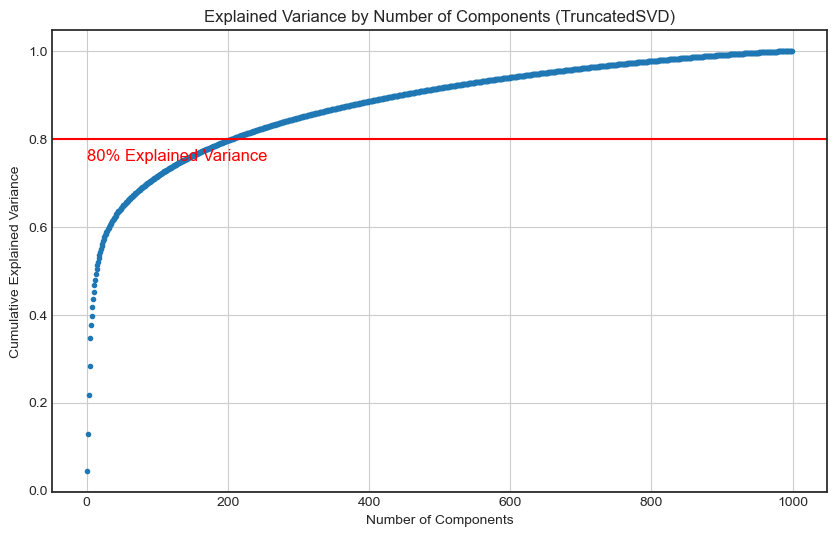

In [38]:
svd = TruncatedSVD(n_components=word_mat.shape[1] - 1, random_state=72)
svd.fit(word_mat)

cumulative_variance_ratio_svd = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio_svd) + 1), cumulative_variance_ratio_svd, marker='.', linestyle='')
plt.title('Explained Variance by Number of Components (TruncatedSVD)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.75, '80% Explained Variance', color = 'red', fontsize=12)
plt.show()

In [39]:
# 31 ~ 205
print("Number of components that explain 60% variance: ",len(cumulative_variance_ratio_svd[cumulative_variance_ratio_svd <= 0.6])) 
print("Number of components that explain 80% variance: ",len(cumulative_variance_ratio_svd[cumulative_variance_ratio_svd <= 0.8])) 
(cumulative_variance_ratio_svd[cumulative_variance_ratio_svd <= 0.8])[31], (cumulative_variance_ratio_svd[cumulative_variance_ratio_svd <= 0.8])[204]

Number of components that explain 60% variance:  31
Number of components that explain 80% variance:  205


(np.float64(0.6006849529559312), np.float64(0.79995214349277))

Adjust our custom transformer to add the truncated svd fitting, we use the number of components that can expain 80% variance.

In [40]:
class text_token_transformer_plus_encoding_plus_decomposition(BaseEstimator, TransformerMixin):
    def __init__(self, top_num = 500, n_components=100): # inital quantile 0.9
        self.top_num = top_num
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')
        
        self.key_encoder = OneHotEncoder()
        self.mode_encoder = OneHotEncoder()
        #self.acoustic_encoder = OneHotEncoder()

        self.n_components = n_components
        self.svd = TruncatedSVD(n_components= self.n_components, random_state=68)

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]) # sparse matrix

        #self.term_counts_ = np.asarray(self.word_matrix_.sum(axis=0)).ravel()
        self._term_counts = self.word_matrix_.sum(axis=0).A1
        self.terms_ = self.vectorizer_.get_feature_names_out()

        sort_lis = sorted(zip(self._term_counts, self.terms_), key = lambda x: x[0], reverse= True)
        self._keep_idx = self.top_num
        sort_lis_cut = sort_lis[:self._keep_idx]
        
        word_lis_sorted = [pair[1] for pair in sort_lis_cut] # top down, sorted
        
        mask = np.isin(self.terms_, word_lis_sorted) 
        self.word_matrix_ = self.word_matrix_[:, mask]

        self.svd.fit(self.word_matrix_)

        self.key_encoder.fit(X[["key"]])
        self.mode_encoder.fit(X[["mode"]])
        #self.acoustic_encoder.fit(X[["acousticness"]])

        return self
    
    def transform(self, X, y = None):

        word_mat = self.vectorizer_.transform(X["combined_text"])
        sort_lis = sorted(zip(self._term_counts, self.terms_), key = lambda x: x[0], reverse= True)
        self._keep_idx = self.top_num
        sort_lis_cut = sort_lis[:self._keep_idx]
        
        word_lis_sorted = [pair[1] for pair in sort_lis_cut] # top down, sorted
        
        mask = np.isin(self.terms_, word_lis_sorted) 
        word_mat = word_mat[:, mask]
        word_mat = sparse.csr_matrix(self.svd.transform(word_mat))
        
        ### encoding part
        #key_cat_matrix = key_mode_interaction_encode(X)[0]
        #mode_cat_matrix = key_mode_interaction_encode(X)[1]
        #key_mode_cat_interaction_matrix = key_mode_interaction_encode(X)[2]
        #acoustic_cat_matrix = key_mode_interaction_encode(X)[3]
        key_mat = self.key_encoder.transform(X[["key"]])
        mode_mat = self.mode_encoder.transform(X[["mode"]])
        
        n_samples, n_keys = key_mat.shape 
        _, n_modes = mode_mat.shape

        key_idx = key_mat.nonzero()[1]
        mode_idx = mode_mat.nonzero()[1]
        rows = np.arange(n_samples)

        interaction_idx = key_idx * n_modes + mode_idx
        interaction_data = np.ones_like(rows, dtype=float)
        
        key_mode_mat = sparse.csr_matrix(
            (interaction_data, (rows, interaction_idx)),
            shape=(n_samples, n_keys * n_modes)
        )
        #acoustic_mat = self.acoustic_encoder.transform(X[["acousticness"]])

        #acoustic_cat_matrix = self.acoustic_encoder.transform(X[["acousticness"]]) # 4

        final_mat = sparse.hstack([word_mat, key_mat, mode_mat, key_mode_mat], format="csr")
        
        return final_mat

In [41]:
Pipe_create_mat_svd = FeatureUnion(transformer_list=[
    ('categorical', text_token_transformer_plus_encoding_plus_decomposition(top_num=1000, n_components=205)), # sparse matrix
    ('numerical', scaler_column)
])

### Dimensionality-reduced Training Matrix 

#### Random Forest

In [65]:
Pipe_randomforest_svd = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_svd),
    ('rf', RandomForestRegressor(**params_rf, bootstrap=True, random_state= 123))
])

Pipe_randomforest_svd.fit(df_train_combo, y_train)

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding_plus_decomposition(n_components=205,
                                                                                                         top_num=1000)),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined',
                                                                                   'acousticness'])]))])),
                ('rf',
                 RandomForestRegressor(max_depth=11, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=7,
                                       n_estimators=374, random_state=123))])

In [66]:
pred_rf_svd_mat = Pipe_randomforest_svd.predict(df_train_combo)
print("Random Forest with demension reduced training matrix MSE: ", mean_squared_error(pred_rf_svd_mat, y_train))
print("Random Forest with demension reduced training matrix R^2: ", r2_score(pred_rf_svd_mat, y_train))

print("\n")
pred_rf_svd_mat = Pipe_randomforest_svd.predict(df_validate_combo)
print("Random Forest with demension reduced validating matrix MSE: ", mean_squared_error(pred_rf_svd_mat, y_validate))
print("Random Forest with demension reduced validating matrix R^2: ", r2_score(pred_rf_svd_mat, y_validate))

Random Forest with demension reduced training matrix MSE:  272.4744682932959
Random Forest with demension reduced training matrix R^2:  -3.4040004077471826


Random Forest with demension reduced validating matrix MSE:  408.89331534204126
Random Forest with demension reduced validating matrix R^2:  -7.819061910460082


#### XG Boost

In [67]:
Pipe_xgb_svd = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_svd),
    ('xgb', xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state= 123))
])

Pipe_xgb_svd.fit(df_train_combo, y_train)

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding_plus_decomposition(n_components=205,
                                                                                                         top_num=1000)),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy...
                              feature_types=None, feature_weights=None,
                              gamma=0.327, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.173,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=347, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [68]:
pred_xgb_svd_mat = Pipe_xgb_svd.predict(df_train_combo)
print("XG Boost with demension reduced training matrix MSE: ", mean_squared_error(pred_xgb_svd_mat, y_train))
print("XG Boost with demension reduced training matrix R^2: ", r2_score(pred_xgb_svd_mat, y_train))

print("\n")
pred_xgb_svd_mat = Pipe_xgb_svd.predict(df_validate_combo)
print("XG Boost with demension reduced validating matrix MSE: ", mean_squared_error(pred_xgb_svd_mat, y_validate))
print("XG Boost with demension reduced validating matrix R^2: ", r2_score(pred_xgb_svd_mat, y_validate))

XG Boost with demension reduced training matrix MSE:  10.529961585998535
XG Boost with demension reduced training matrix R^2:  0.9729264378547668


XG Boost with demension reduced validating matrix MSE:  446.8184814453125
XG Boost with demension reduced validating matrix R^2:  -1.4348649978637695


#### Light GBM

In [69]:
Pipe_lgb_svd = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_svd),
    ('lgb', lgb.LGBMRegressor(**params_lgb,  objective='regression_l2', eval_metric = 'rmse', random_state=123))
])

Pipe_lgb_svd.fit(df_train_combo, y_train)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54646
[LightGBM] [Info] Number of data points in the train set: 16125, number of used features: 252
[LightGBM] [Info] Start training from score 45.558698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding_plus_decomposition(n_components=205,
                                                                                                         top_num=1000)),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined',
                                                                                   'acousticness'])]))])),
                ('lgb',
                 LGBMRegressor(colsample_bytree=0.84, eval_metric='rmse',
                               learning_rate=0.073, max_depth=12,
                               min_child_samples=28, n_estimators=786,
                               num_leaves=67, objective='regression_l2',
                               random_state=123, reg_alpha=0.32,
                               reg_lambda=0.61, subsample=0.73))])

In [70]:
pred_lgb_svd_mat = Pipe_lgb_svd.predict(df_train_combo)
print("Light GBM with demension reduced training matrix MSE: ", mean_squared_error(pred_lgb_svd_mat, y_train))
print("Light GBM with demension reduced training matrix R^2: ", r2_score(pred_lgb_svd_mat, y_train))

print("\n")
pred_lgb_svd_mat = Pipe_lgb_svd.predict(df_validate_combo)
print("Light GBM with demension reduced validating matrix MSE: ", mean_squared_error(pred_lgb_svd_mat, y_validate))
print("Light GBM with demension reduced validating matrix R^2: ", r2_score(pred_lgb_svd_mat, y_validate))

d:\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: eval_metric
Light GBM with demension reduced training matrix MSE:  24.93092674184546
Light GBM with demension reduced training matrix R^2:  0.9259807552761156


[LightGBM] [Warning] Unknown parameter: eval_metric
Light GBM with demension reduced validating matrix MSE:  398.1375519462058
Light GBM with demension reduced validating matrix R^2:  -2.0730963015644903


d:\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Note from using dimensionality-reduced training matrix 

We can see that applying dimensionality reduction before training slightly improves training metrics, but the effect depends on the algorithm. For instance, random forest still performs poorly on both training and validation. Overall model generalization remains weak, let's next examine whether adding the categorical and word matrix can help improve the model. 

## Test Word Matrix and Categorical Matrix

We use the XG Boost to test the performance of the model that is fitted on 

1. Word matrix only

2. Numerical + Word matrix

3. Numerical matrix + Categorical matrix

Word matrix only

In [65]:
class only_word_mat(BaseEstimator, TransformerMixin):
    def __init__(self, top_num = 500): # inital quantile 0.9
        self.top_num = top_num
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]) # sparse matrix

        #self.term_counts_ = np.asarray(self.word_matrix_.sum(axis=0)).ravel()
        self._term_counts = self.word_matrix_.sum(axis=0).A1
        self.terms_ = self.vectorizer_.get_feature_names_out()


        return self
    
    def transform(self, X, y = None):

        word_mat = self.vectorizer_.transform(X["combined_text"])
        sort_lis = sorted(zip(self._term_counts, self.terms_), key = lambda x: x[0], reverse= True)
        self._keep_idx = self.top_num
        sort_lis_cut = sort_lis[:self._keep_idx]
        
        word_lis_sorted = [pair[1] for pair in sort_lis_cut] # top down, sorted
        
        mask = np.isin(self.terms_, word_lis_sorted) 
        word_mat = word_mat[:, mask]
        #word_mat = sparse.csr_matrix(word_mat)
        
        return word_mat

Pipe_experiment = Pipeline([
    ('word_mat', only_word_mat(top_num=500)),
    ('xgb', xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state= 123))
])

Pipe_experiment.fit(df_train_combo, y_train)

Pipeline(steps=[('word_mat', only_word_mat()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.5, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='rmse',
                              feature_types=None, feature_weights=None,
                              gamma=0.327, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.173,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=347, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [66]:
pred_xgb_complete_mat = Pipe_experiment.predict(df_train_combo)
print("XG Boost with word matrix only training MSE: ", mean_squared_error(pred_xgb_complete_mat, y_train))
print("XG Boost with word matrix only training R^2: ", r2_score(pred_xgb_complete_mat, y_train))

print('\n')

test_mat = only_word_mat(top_num=500).fit_transform(df_validate_combo)
pred_xgb_complete_mat = Pipe_experiment.named_steps['xgb'].predict(test_mat)
print("XG Boost with word matrix only validating MSE: ", mean_squared_error(pred_xgb_complete_mat, y_validate))
print("XG Boost with word matrix only validating R^2: ", r2_score(pred_xgb_complete_mat, y_validate))

XG Boost with word matrix only training MSE:  305.0748291015625
XG Boost with word matrix only training R^2:  -2.4084432125091553


XG Boost with word matrix only validating MSE:  553.87353515625
XG Boost with word matrix only validating R^2:  -6.381019115447998


Numerical + Word matrix

In [ ]:
Pipe_create_mat_experiment = FeatureUnion(transformer_list=[
    ('categorical', only_word_mat(top_num=500)), # sparse matrix
    ('numerical', scaler_column)
])

Pipe_experiment = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_experiment),
    ('xgb', xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state= 123))
])

Pipe_experiment.fit(df_train_combo, y_train)

pred_xgb_complete_mat = Pipe_experiment.predict(df_train_combo)
print("XG Boost with numerical and word matrix training MSE: ", mean_squared_error(pred_xgb_complete_mat, y_train))
print("XG Boost with numerical and word matrix training R^2: ", r2_score(pred_xgb_complete_mat, y_train))

print('\n')
pred_xgb_complete_mat = Pipe_experiment.predict(df_validate_combo)
print("XG Boost with numerical and word matrix validating MSE: ", mean_squared_error(pred_xgb_complete_mat, y_validate))
print("XG Boost with numerical and word matrix validating R^2: ", r2_score(pred_xgb_complete_mat, y_validate))

XG Boost with numerical and word matrix training MSE:  112.50619506835938
XG Boost with numerical and word matrix training R^2:  0.4504661560058594


XG Boost with numerical and word matrix validating MSE:  391.57452392578125
XG Boost with numerical and word matrix validating R^2:  -1.6043720245361328


Numerical matrix + Categorical matrix

In [52]:
class only_encoding(BaseEstimator, TransformerMixin):
    def __init__(self): # inital quantile 0.9
        self.key_encoder = OneHotEncoder()
        self.mode_encoder = OneHotEncoder()
        #self.acoustic_encoder = OneHotEncoder()

    def fit(self, X, y=None):
        self.key_encoder.fit(X[["key"]])
        self.mode_encoder.fit(X[["mode"]])
        #self.acoustic_encoder.fit(X[["acousticness"]])
        return self
    
    def transform(self, X, y = None):
        key_mat = self.key_encoder.transform(X[["key"]])
        mode_mat = self.mode_encoder.transform(X[["mode"]])
        
        n_samples, n_keys = key_mat.shape 
        _, n_modes = mode_mat.shape

        key_idx = key_mat.nonzero()[1]
        mode_idx = mode_mat.nonzero()[1]
        rows = np.arange(n_samples)

        interaction_idx = key_idx * n_modes + mode_idx
        interaction_data = np.ones_like(rows, dtype=float)
        
        key_mode_mat = sparse.csr_matrix(
            (interaction_data, (rows, interaction_idx)),
            shape=(n_samples, n_keys * n_modes)
        )
        #acoustic_mat = self.acoustic_encoder.transform(X[["acousticness"]])

        #acoustic_cat_matrix = self.acoustic_encoder.transform(X[["acousticness"]]) # 4

        final_mat = sparse.hstack([key_mat, mode_mat, key_mode_mat], format="csr")
        
        return final_mat

Pipe_create_mat_experiment = FeatureUnion(transformer_list=[
    ('categorical', only_encoding()), # sparse matrix
    ('numerical', scaler_column)
])

Pipe_experiment = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_experiment),
    ('xgb', xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state= 123))
])

Pipe_experiment.fit(df_train_combo, y_train)


Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 only_encoding()),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined',
                                                                                   'acousticness'])]))])),
                ('xgb',
                 XGBRegressor(base_score=None, b...
                              feature_types=None, feature_weights=None,
                              gamma=0.327, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.173,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=347, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [53]:
pred_xgb_complete_mat = Pipe_experiment.predict(df_train_combo)
print("XG Boost with numerical and categorical matrix training MSE: ", mean_squared_error(pred_xgb_complete_mat, y_train))
print("XG Boost with numerical and categorical matrix matrix training R^2: ", r2_score(pred_xgb_complete_mat, y_train))

print('\n')
pred_xgb_complete_mat = Pipe_experiment.predict(df_validate_combo)
print("XG Boost with numerical and categorical matrix matrix validating MSE: ", mean_squared_error(pred_xgb_complete_mat, y_validate))
print("XG Boost with numerical and categorical matrix matrix validating R^2: ", r2_score(pred_xgb_complete_mat, y_validate))

XG Boost with numerical and categorical matrix training MSE:  34.464698791503906
XG Boost with numerical and categorical matrix matrix training R^2:  0.8866117596626282


XG Boost with numerical and categorical matrix matrix validating MSE:  416.8681945800781
XG Boost with numerical and categorical matrix matrix validating R^2:  -1.1256916522979736


## Note from Testing Different Matrix

Despite the large dataset size, the word and categorical matrices contribute little valuable information. Including them introduces noise and harms model performance. Hence, it is preferable to use only numerical features, which are simpler, require minimal preprocessing, and yield the best results.

## Model Optimization

Optimize the parameter for each model.

### Random Forest

In [183]:
param_distributions = {
    'n_estimators': randint(100, 500), 
    'max_depth': randint(3, 20),             
    'min_samples_split': randint(2, 11),     
    'min_samples_leaf': randint(1, 11),       
    'max_features': ['sqrt'],
}

rf_reg = RandomForestRegressor(bootstrap=True, random_state= 123)
random_search_rf = RandomizedSearchCV(
    estimator= rf_reg,
    param_distributions=param_distributions,
    n_iter= 100,
    cv=5,
    verbose=1,
    random_state= 68,
    n_jobs=-5
)

search_result_rf = random_search_rf.fit(df_train_num, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
pred_rf_search = search_result_rf.best_estimator_.predict(df_train_num)

print('Best search random forest training MSE', mean_squared_error(pred_rf_search, y_train))
print('Best search random forest training R^2', r2_score(pred_rf_search, y_train))

print('\n')
pred_rf_search = search_result_rf.best_estimator_.predict(df_validate_num)
print('Best search random forest validating MSE', mean_squared_error(pred_rf_search, y_validate))
print('Best search random forest validating R^2', r2_score(pred_rf_search, y_validate))

Best search random forest training MSE 0.372939226254516
Best search random forest training R^2 0.9991088256130174


Best search random forest testing MSE 0.8600359369193994
Best search random forest testing R^2 0.9980821502017316


In [190]:
search_result_rf.best_params_

{'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 379}

In [193]:
import json
from pathlib import Path

best_params_rf = search_result_rf.best_params_

save_dir = Path("dataset")          # 相对路径
save_path = save_dir / "rf_best_params.json"

with open(save_path, "w", encoding="utf-8") as f:
    json.dump(best_params_rf, f, ensure_ascii=False, indent=2)


### XG Boost

In [197]:
param_distributions = {
    'n_estimators': randint(100, 500), 
    'learning_rate': uniform(0.01, 0.29),

    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),

    'gamma': uniform(0, 0.5),
    'reg_lambda': uniform(1, 4)
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',eval_metric='rmse',
                           random_state=123)

random_search_xgb = RandomizedSearchCV(
    estimator= xgb_reg,
    param_distributions=param_distributions,
    n_iter= 100,
    cv=5,
    verbose=1,
    random_state= 68,
    n_jobs=-5,
    error_score="raise"
)

search_result_xgb = random_search_xgb.fit(df_train_num, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [198]:
search_result_xgb.best_params_

{'colsample_bytree': np.float64(0.9893057616406441),
 'gamma': np.float64(0.1758760684257341),
 'learning_rate': np.float64(0.19563148415815482),
 'max_depth': 4,
 'n_estimators': 322,
 'reg_lambda': np.float64(3.1695128661227816),
 'subsample': np.float64(0.8367300955799766)}

In [ ]:
pred_xgb_search = search_result_xgb.best_estimator_.predict(df_train_num)

print('Best search XG Boost training MSE', mean_squared_error(pred_xgb_search, y_train))
print('Best search XG Boost training R^2', r2_score(pred_xgb_search, y_train))

print('\n')
pred_xgb_search = search_result_xgb.best_estimator_.predict(df_validate_num)
print('Best search XG Boost validating MSE', mean_squared_error(pred_xgb_search, y_validate))
print('Best search XG Boost validating R^2', r2_score(pred_xgb_search, y_validate))

Best search Light GBM training MSE 0.0024156116414815187
Best search Light GBM training R^2 0.9999943971633911


Best search Light GBM testing MSE 0.0026642747689038515
Best search Light GBM testing R^2 0.9999943375587463


In [200]:
best_params_xgb = search_result_xgb.best_params_

save_dir = Path("dataset")          # 相对路径
save_path = save_dir / "xgb_best_params.json"

with open(save_path, "w", encoding="utf-8") as f:
    json.dump(best_params_xgb, f, ensure_ascii=False, indent=2)

### Light GBM

In [187]:
param_distributions = {
    'n_estimators': randint(200, 1000), 
    'learning_rate': uniform(0.01, 0.1),

    'num_leaves': randint(20, 100),
    'max_depth': randint(7, 15),
    'min_child_samples': randint(10, 50),

    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),

    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

lgb_reg = lgb.LGBMRegressor(objective= "regression_l2", metric = "rmse", random_state= 123)

random_search_lgb = RandomizedSearchCV(
    estimator= lgb_reg,
    param_distributions=param_distributions,
    n_iter= 100,
    cv=5,
    verbose=1,
    random_state= 68,
    n_jobs=-5,
    error_score="raise"
)

search_result_lgb = random_search_lgb.fit(df_train_num, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2139
[LightGBM] [Info] Number of data points in the train set: 17982, number of used features: 9
[LightGBM] [Info] Start training from score 45.489990


In [ ]:
pred_lgb_search = search_result_lgb.best_estimator_.predict(df_train_num)

print('Best search Light GBM training MSE', mean_squared_error(pred_lgb_search, y_train))
print('Best search Light GBM training R^2', r2_score(pred_lgb_search, y_train))

print('\n')
pred_lgb_search = search_result_lgb.best_estimator_.predict(df_validate_num)
print('Best search Light GBM validating MSE', mean_squared_error(pred_lgb_search, y_validate))
print('Best search Light GBM validating R^2', r2_score(pred_lgb_search, y_validate))

Best search Light GBM training MSE 8.462978199152762e-05
Best search Light GBM training R^2 0.9999998036401188


Best search Light GBM testing MSE 0.00013475538456647447
Best search Light GBM testing R^2 0.9999997132201749


In [195]:
search_result_lgb.best_params_

{'colsample_bytree': np.float64(0.909734746733807),
 'learning_rate': np.float64(0.07489233714435153),
 'max_depth': 7,
 'min_child_samples': 10,
 'n_estimators': 627,
 'num_leaves': 21,
 'reg_alpha': np.float64(0.13764674449204206),
 'reg_lambda': np.float64(0.052426386778670175),
 'subsample': np.float64(0.5551945302907244)}

In [196]:
best_params_lgb = search_result_lgb.best_params_

save_dir = Path("dataset")          # 相对路径
save_path = save_dir / "lgb_best_params.json"

with open(save_path, "w", encoding="utf-8") as f:
    json.dump(best_params_lgb, f, ensure_ascii=False, indent=2)

## Model stacking

In [203]:
with open("dataset/rf_best_params.json", "r", encoding="utf-8") as f:
    saved_params_rf = json.load(f)

with open("dataset/xgb_best_params.json", "r", encoding="utf-8") as f:
    saved_params_xgb = json.load(f)

with open("dataset/lgb_best_params.json", "r", encoding="utf-8") as f:
    saved_params_lgb = json.load(f)

In [209]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

best_rf_reg = RandomForestRegressor(**saved_params_rf, bootstrap=True, random_state= 123)
best_xgb_reg = xgb.XGBRegressor(**saved_params_xgb,  objective='reg:squarederror', eval_metric = 'rmse', random_state=123)
best_lgb_reg = lgb.LGBMRegressor(**saved_params_lgb, objective='regression_l2', eval_metric = 'rmse', random_state=123)

estimator_lis = [('rf', best_rf_reg), 
                 ('xgb', best_xgb_reg), 
                 ('lgb', best_lgb_reg)
                 ]

stacking_reg = StackingRegressor(estimators=estimator_lis, final_estimator=RidgeCV(),
                                 n_jobs=-5)

stacking_reg.fit(df_train_num, y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=18,
                                                     max_features='sqrt',
                                                     min_samples_split=8,
                                                     n_estimators=379,
                                                     random_state=123)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9893057616406441,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=...
                                            num_parallel_tree=None, ...)),
                              ('lgb',
                               LGBMRegressor(colsample_bytree=0.909734746733807,
                                             eval_metric='rmse',
                                             learning_rate=0.07489233714435153,
                                             max_depth=7, min_child_samples=10,
                                             n_estimators=627, num_leaves=21,
                                             objective='regression_l2',
                                             random_state=123,
                                             reg_alpha=0.13764674449204206,
                                             reg_lambda=0.052426386778670175,
                                             subsample=0.5551945302907244))],
                  final_estimator=RidgeCV(), n_jobs=-5)

In [217]:
coef = stacking_reg.final_estimator_.coef_
base_names = list(stacking_reg.named_estimators_.keys())
dict(zip(base_names, coef))

{'rf': np.float64(-0.0028848936223955235),
 'xgb': np.float64(0.5395658495392865),
 'lgb': np.float64(0.4634144321066671)}

In [218]:
pred_stack = stacking_reg.predict(df_train_num)
print('Stacking estimator training MSE: ',mean_squared_error(pred_stack, y_train))
print('Stacking estimator training R^2: ',r2_score(pred_stack, y_train))

print('\n')
pred_stack = stacking_reg.predict(df_test_num)
print('Stacking estimator testing MSE: ',mean_squared_error(pred_stack, y_test))
print('Stacking estimator testing R^2: ',r2_score(pred_stack, y_test))

[LightGBM] [Warning] Unknown parameter: eval_metric
Stacking estimator training MSE:  0.0007322962401025943
Stacking estimator training R^2:  0.9999983011110893


[LightGBM] [Warning] Unknown parameter: eval_metric
Stacking estimator testing MSE:  0.0007971975219002716
Stacking estimator testing R^2:  0.9999983034451086
